# Titanic: Died or Survived? 

The following notebook goes about the Titanic dataset and it aims to predict whether the passenger die or survive the catastrophe.

First we import the esential libraries in order to read the data:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 891 registers and 12 columns in the train set.

In [5]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We have 418 registers and 11 columns in the test set. The missing column is the Survived column which makes sense since this will be our target variable.
The missing column is in the gender submission csv:

In [6]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Once we have read all of it, let's check out the data.

## 1. Data Review

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


So we have nulls in Cabin, Embarked, Age and Fare features. We have to fix them. 

Let's begin by describing each of the 12 columns:

* PassengerId: a number that identifies each passenger.
* Survived: indicates if the passenger survived (1) or not (0).
* Pclass: 1st, 2nd and 3rd class.
* Name: Full Name of the Passenger.
* Sex: Sexo of the Passenger.
* Age: Age of the Passenger
* SibSp: Number of sibling or spose aboard.
* Parch: Number of parents or children aboard
* Ticket: Type of ticket bought for the journey (?) 
* Fare: Price of the Ticket they bought.
* Cabin: I have no idea, but it will not matter as we will see. 
* Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

We start by fixing the Missing Data.

## 2. Missing Data

In [10]:
t = train.isnull().sum().sort_values(ascending = False)/len(train) * 100
print('The percentage of missing data per feature in the train data is:')
t

The percentage of missing data per feature in the train data is:


Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

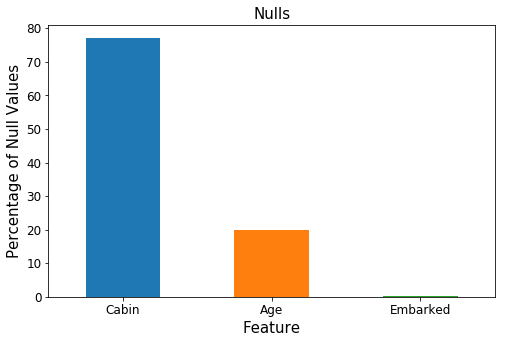

In [11]:
plt.figure(figsize = (8,5))
t.head(3).plot.bar()
plt.title('Nulls', fontsize = 15)
plt.ylabel('Percentage of Null Values', fontsize = 15)
plt.xlabel('Feature', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

The categorical feature Embarked has only 0.22 % of nulls so fill the NAN with the mode should be enough. Regarding to Cabin it seems likely that this nulls correpond to passengers without Cabin, so we shall replace those nulls with a new categorical value named 'None'. At last, Age has 20% of nulls so we need a deeper review in order to decide how to fix it.

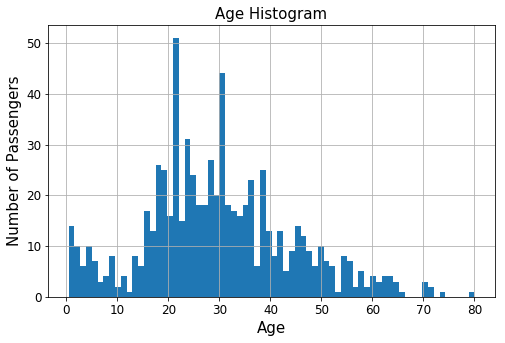

In [12]:
plt.figure(figsize = (8,5))
train.Age.hist(bins = 70)
plt.title('Age Histogram', fontsize = 15)
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [13]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Let's take the mean to fill the nulls in this feature. 

In the test set we have a single null in the Fare Feature. We will replace it by the mean value. 

Now we will fix the missing data in train and test:

In [14]:
train.Cabin = train.Cabin.fillna('None')
test.Cabin = test.Cabin.fillna('None')

In [15]:
train.Age = train.Age.fillna(round(train.Age.mean(),0))
test.Age = test.Age.fillna(round(train.Age.mean(),0))

In [16]:
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked = test.Embarked.fillna(test.Embarked.mode()[0])

In [17]:
test.Fare = test.Fare.fillna(test.Fare.mean())

In [18]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

So we have fix the missing data problem.

## 3. Statistical Analysis

For this analysis we will concatenate the train and test set: 

In [20]:
y_test = submission.Survived
test['Survived'] = y_test

y_train = train['Survived']
train = train.drop('Survived', 1)
train['Survived'] = y_train

In [21]:
data = pd.concat([train, test], ignore_index= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Since Passenger Id is redundant information let's drop it:

In [22]:
data.drop('PassengerId', 1, inplace = True)

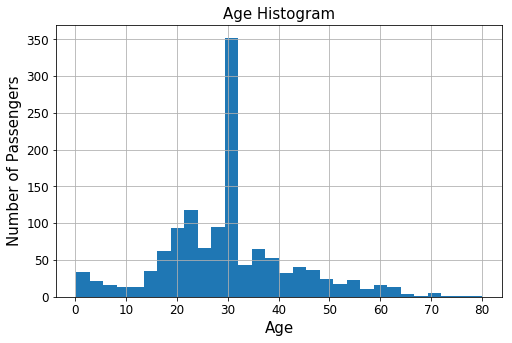

In [23]:
plt.figure(figsize = (8,5))
data.Age.hist(bins = 30)
plt.title('Age Histogram', fontsize = 15)
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

In [24]:
t = data.groupby('Sex')['Survived'].sum().sum()/len(data)*100
print('Only the %1.2f' %t + ' per cent of the passengers survived.' ) 

Only the 37.74 per cent of the passengers survived.


In [25]:
data.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum()/len(x)*100)

,Survived
Sex,
female,82.618026
male,12.930012


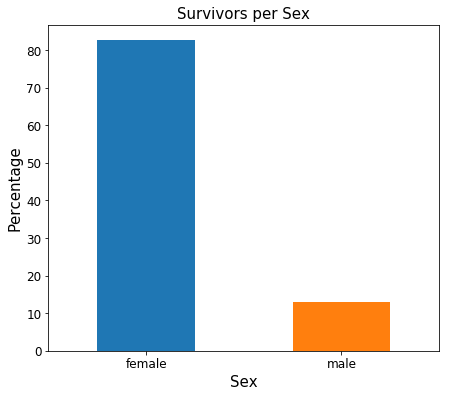

In [26]:
plt.figure(figsize=(7,6))
data.groupby('Sex')['Survived'].aggregate(lambda x: x.sum()/len(x)*100).plot.bar()
plt.title('Survivors per Sex', fontsize = 15)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

Eighty percent of women who where on the Titanic survived meanwhile only 12 percent of men in the Titanic survived as well.

In [27]:
data.groupby(['Sex'])[['Cabin']].count()

,Cabin
Sex,
female,466
male,843


There were more males than females in the Titanic.

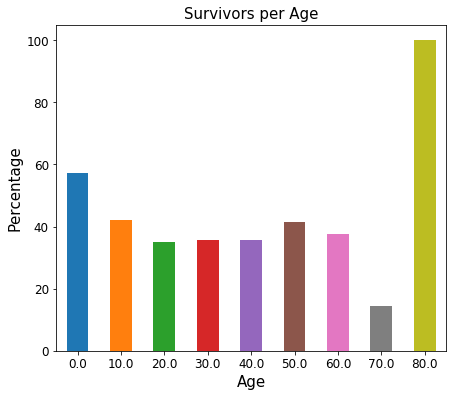

In [28]:
plt.figure(figsize=(7,6))
data.groupby(data.Age // 10 * 10)['Survived'].aggregate(lambda x: x.sum()/ len(x)*100).plot.bar()
plt.title('Survivors per Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

As we see, children from 0 to 19 years were more likely to survive in the Titanic. We have 100% 80-years-old survivors because there were only one 80-years-old passenger and he survived. Now we present the same graph but in number of Survivors instead of percentage:

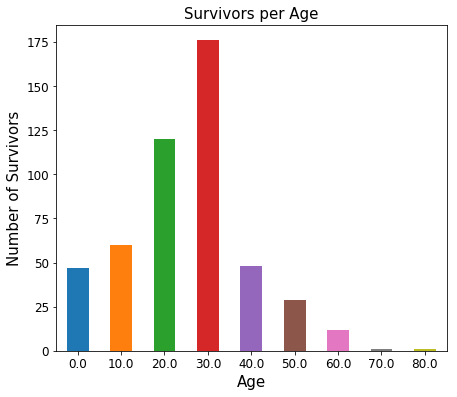

In [29]:
plt.figure(figsize=(7,6))
data.groupby(data.Age // 10 * 10)['Survived'].aggregate(lambda x: x.sum()).plot.bar()
plt.title('Survivors per Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of Survivors', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

Now we analyse the Classes:

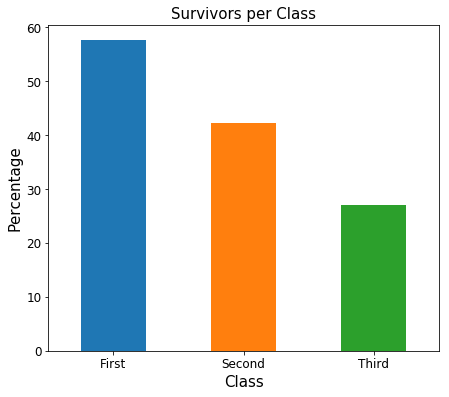

In [30]:
plt.figure(figsize=(7,6))
data.groupby(data.Pclass)['Survived'].aggregate(lambda x: x.sum()/ len(x)*100).plot.bar()
plt.title('Survivors per Class', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(range(3), ['First', 'Second', 'Third'],fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

As we see, it is more likely to survive if you are in First Class. Now the same but in number of survivors:

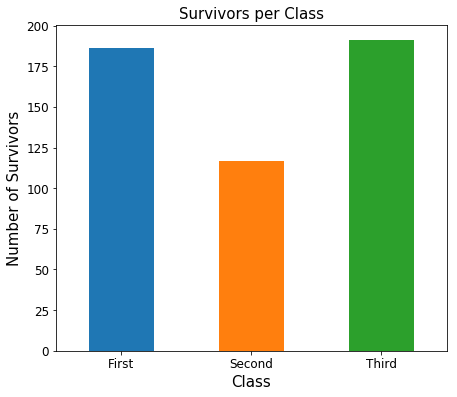

In [31]:
plt.figure(figsize=(7,6))
data.groupby(data.Pclass)['Survived'].aggregate(lambda x: x.sum()).plot.bar()
plt.title('Survivors per Class', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Number of Survivors', fontsize = 15)
plt.xticks(range(3), ['First', 'Second', 'Third'],fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

It seems strange that there more survivors from Third than from Second Class. Let's check it:

In [32]:
data.groupby(['Pclass'])[['Name']].count()

,Name
Pclass,
1,323
2,277
3,709


As we see there were a lot more passengers in third class than in second class, so it make sense that there were more survivors. Now let's group by Pclass and by Sex: 

In [33]:
data.groupby(['Pclass', 'Sex'])[['Survived']].sum()

Survived
Pclass Sex             
1      female       141
       male          45
2      female       100
       male          17
3      female       144
       male          47

<Figure size 504x432 with 0 Axes>

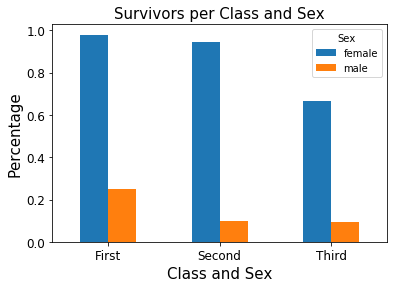

In [34]:
plt.figure(figsize=(7,6))
data.groupby(['Pclass', 'Sex'])['Survived'].aggregate(lambda x: x.sum()/len(x)).unstack().plot.bar()
plt.title('Survivors per Class and Sex', fontsize = 15)
plt.xlabel('Class and Sex', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.xticks(range(3), ['First', 'Second', 'Third'],fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12);

From this, we can infer that the determinant feature to survive and first, second and third class is to be a woman meanwhile, men were more likely to survive according to his class.

## 4. Picking Train and Test Set 

Let's drop the PassengerId, Name, Ticket, Survived columns from the train and test set to form X_train and X_test: 

In [35]:
X_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'],1)
X_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Survived','Cabin'],1)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

## 5. Machine Learning

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

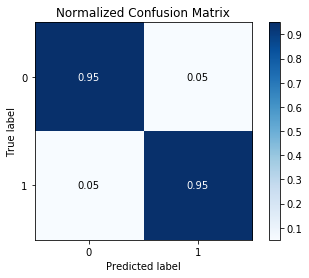

In [38]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)

In [39]:
print('Area bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_pred))

Area bajo la curva ROC:  0.951


Our metrics give us terrific numbers, so the model performs quite well.

### Classification Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

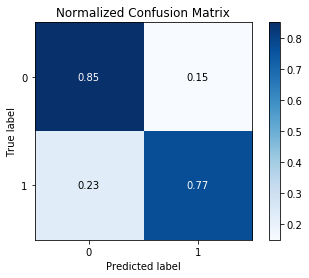

In [42]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)

In [43]:
print('Area bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_pred))

Area bajo la curva ROC:  0.810


Clearly this method does not perform as good as the Logistic Regression. 

### Supported Vector Machine

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

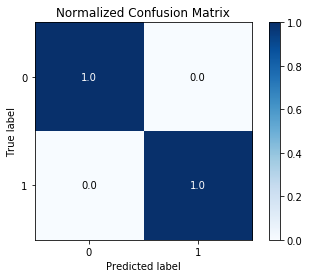

In [46]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)

In [47]:
print('Area bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_pred))

Area bajo la curva ROC:  1.000


SVM performs perfect on this dataset.

Let's convert our predictions to csv in order to submit our answer to Kaggle:

In [48]:
# submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})
# submission.head()

In [49]:
# filename = 'Titanic_PredictionsSVM.csv'

# submission.to_csv(filename,index=False)